# Extrapolation Problem: Random Forest

First we will generate a synthetic dataset based on a linear equation:
$$
y = x
$$

along with random noise in the range of 25 to 75. We will fit this data using Random Forest, XGBoost, ANN, Linear Regression, stacking regressor using a Linear model and a Random Forest Regressor, and SVM regression and look **outside** the range of the original training dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rng_x = np.random.default_rng(100)
rng_y = np.random.default_rng(30)
train_x = 25 + 50*rng_x.random(60)
train_y = train_x + 20*(rng_y.random(60)-.5)

test_x = np.linspace(0,100,100)
y_true = test_x

train_x = train_x.reshape(-1, 1)
test_x = test_x.reshape(-1, 1)


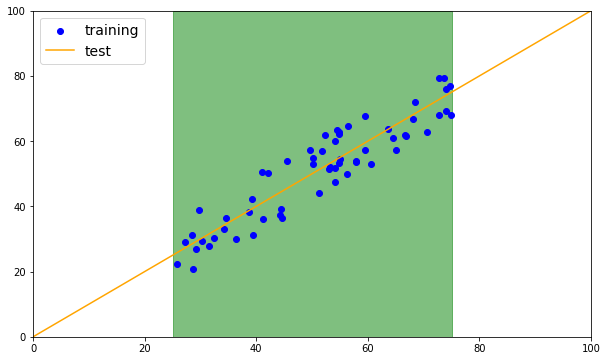

In [3]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.axvspan(25, 75 , color='green', alpha=0.5)
ax.scatter(x=train_x, y=train_y, c='blue', label='training')

ax.plot(test_x, y_true, c='orange', label='test')
plt.legend(loc="upper left",fontsize=14)

ax.set(xlim=(0, 100), ylim=(0, 100))

plt.show()

## Random Forest

In [4]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(train_x, train_y)
pred = reg.predict(test_x)

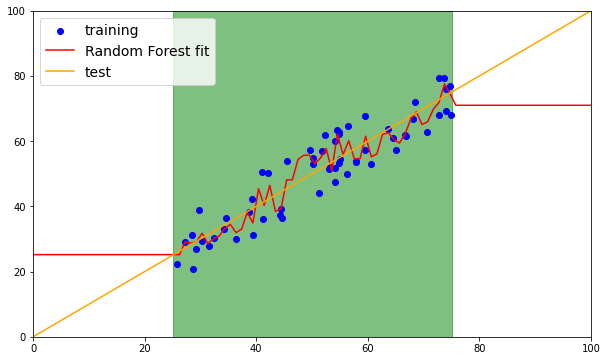

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.axvspan(25, 75 , color='green', alpha=0.5)
ax.scatter(x=train_x, y=train_y, c='blue', label='training')

ax.plot(test_x, pred, c='red', label='Random Forest fit')

ax.plot(test_x, y_true, c='orange', label='test')
plt.legend(loc="upper left",fontsize=14)

ax.set(xlim=(0, 100), ylim=(0, 100))

plt.show()

## XGBoost

In [6]:
import xgboost as xgb
reg = xgb.XGBRegressor()
reg.fit(train_x, train_y)
pred = reg.predict(test_x)

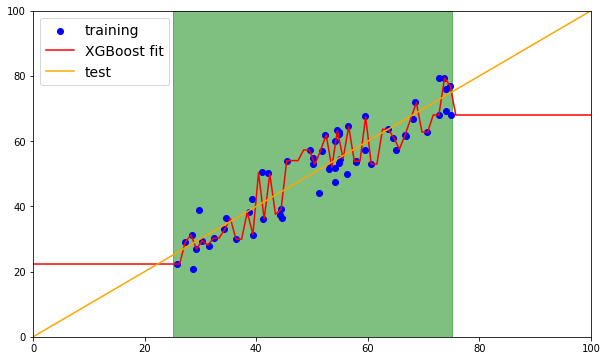

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.axvspan(25, 75 , color='green', alpha=0.5)
ax.scatter(x=train_x, y=train_y, c='blue', label='training')

ax.plot(test_x, pred, c='red', label='XGBoost fit')

ax.plot(test_x, y_true, c='orange', label='test')
plt.legend(loc="upper left",fontsize=14)

ax.set(xlim=(0, 100), ylim=(0, 100))

plt.show()

## Artificial Neural Network

We shall use 20 neurons and train for 200 epochs (using the relu activation), a mean squared error loss funtion and an adam optimizer:

In [8]:
from keras.models import Sequential
from keras.layers import Dense

input_dim = train_x.shape[1]
n_neurons = 20
epochs = 200

model = Sequential()
model.add(Dense(n_neurons, 
                input_dim=input_dim,
                kernel_initializer='normal',
                activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(train_x, train_y, epochs=epochs, verbose=0)
pred = model.predict(test_x)

2023-06-27 11:32:28.433333: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


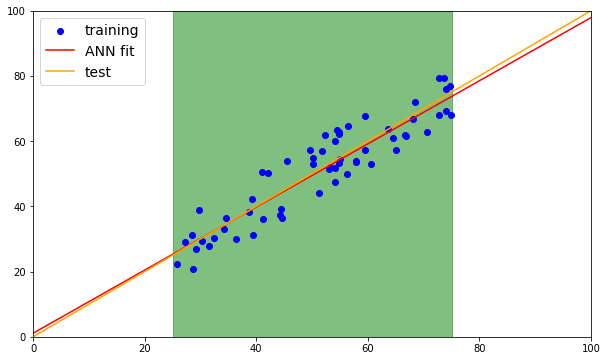

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.axvspan(25, 75 , color='green', alpha=0.5)
ax.scatter(x=train_x, y=train_y, c='blue', label='training')

ax.plot(test_x, pred, c='red', label='ANN fit')

ax.plot(test_x, y_true, c='orange', label='test')
plt.legend(loc="upper left",fontsize=14)

ax.set(xlim=(0, 100), ylim=(0, 100))

plt.show()

## Linear Regression (Least Squares)

In [10]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(train_x, train_y)

pred = reg.predict(test_x)

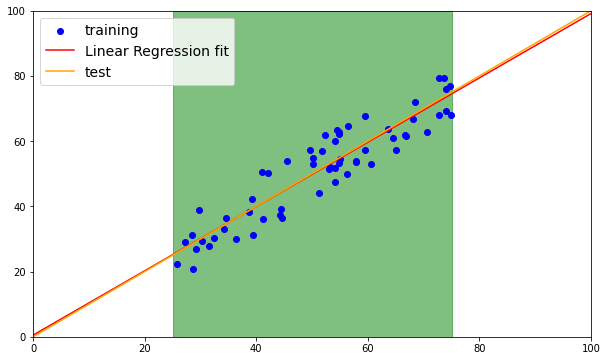

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.axvspan(25, 75 , color='green', alpha=0.5)
ax.scatter(x=train_x, y=train_y, c='blue', label='training')

ax.plot(test_x, pred, c='red', label='Linear Regression fit')

ax.plot(test_x, y_true, c='orange', label='test')
plt.legend(loc="upper left",fontsize=14)

ax.set(xlim=(0, 100), ylim=(0, 100))

plt.show()

## SVM Regressor

In [12]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = SVR(kernel='linear')
reg = model.fit(train_x, train_y)

pred = reg.predict(test_x)

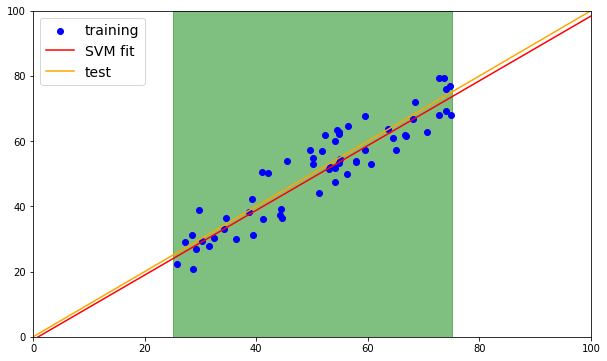

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.axvspan(25, 75 , color='green', alpha=0.5)
ax.scatter(x=train_x, y=train_y, c='blue', label='training')

ax.plot(test_x, pred, c='red', label='SVM fit')

ax.plot(test_x, y_true, c='orange', label='test')
plt.legend(loc="upper left",fontsize=14)

ax.set(xlim=(0, 100), ylim=(0, 100))

plt.show()

## Linear-Tree

We shall now install the linear-tree package written by Marco Cerliani. Linear tree combines the power of the non-parametric decision tree estimators with the ability to extrapolate that is inherent in linear regression.

In [14]:
# !pip install -q --upgrade linear-tree

In [15]:
from lineartree import LinearBoostRegressor
from sklearn.linear_model import LinearRegression

reg = LinearBoostRegressor(base_estimator=LinearRegression(), n_estimators=20)
reg.fit(train_x, train_y)
pred = reg.predict(test_x)

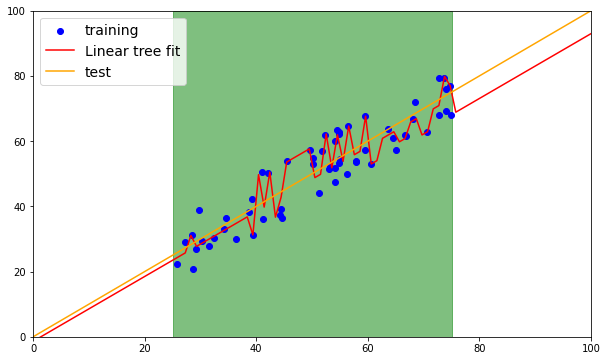

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.axvspan(25, 75 , color='green', alpha=0.5)
ax.scatter(x=train_x, y=train_y, c='blue', label='training')

ax.plot(test_x, pred, c='red', label='Linear tree fit')

ax.plot(test_x, y_true, c='orange', label='test')
plt.legend(loc="upper left",fontsize=14)

ax.set(xlim=(0, 100), ylim=(0, 100))

plt.show()

## Conclusion

For unseen data decision trees use the average of the data contained in the nearest leaf node to the point in question, thus for data outside of the forest it will simply always use the value of the data located at the very "edge" of the forest, hence in this case resulting in a horizontal line.